# What is the multipole expansion

See http://www.springer.com/cda/content/document/cda_downloaddocument/9783319394732-c2.pdf?SGWID=0-0-45-1583683-p179993199 for the maths

## Imports

In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Helpers

In [204]:
def logify_v(v):
    s = np.sign(v)
    s[s == 0] = 1
    return s * np.log10(np.abs(v + s))

def plot(v):
    v = logify_v(v)
    clim = np.max(np.abs(v))
    fig, ax = plt.subplots()
    img = ax.imshow(v, cmap="coolwarm", vmin=-clim, vmax=clim, origin="lower")
    plt.colorbar(img)

## Charge Distributions

In [254]:
# Charges are structures as a list of particles with a [q, x, y]
    
# Large monopole moment (sum of charges != 0)
# No dipole moment (rotational symmetry)
# Small quadropole moment
def equilateral_triangle_charges():
    theta = 0
    return np.array([
        [10, np.cos(theta), np.sin(theta)],
        [10, np.cos(theta + 2/3 * np.pi), np.sin(theta + 2/3 * np.pi)],
        [10, np.cos(theta + 4/3 * np.pi), np.sin(theta + 4/3 * np.pi)],
    ])

# Same as triangle
def square_charges():
    return np.array([
        [10, 1, 1],
        [10, 1, -1],
        [10, -1, 1],
        [10, -1, -1],
    ])

# Pure Dipole
def dipole_charges():
    return np.array([
        [10, 0, 0.5],
        [-10, 0, -0.5],
    ])

# Pure quadropole
def quadropole_charges():
    return np.array([
        [10, 0, 0.5],
        [10, 0, -0.5],
        [-10, 0.5, 0],
        [-10, -0.5, 0],
    ])

def random_charges(count = 5):
    a = []
    for i in range(count):
        a.append(
            np.array([10, np.random.random(), np.random.random()]) * np.random.choice([1, -1], 3)
        )
    return np.array(a)
    

# Setup

In [267]:
charges = random_charges(count=18)
# Build our grid
lim, num = 5, 100
x = np.linspace(-lim, lim, num=num)
y = np.linspace(-lim, lim, num=num)[:, np.newaxis]

# The point around which we will calculate the multipole expansion
r0 = np.array([0.0, 0.0])

# These are just the distances to r0 at each point on the grid
r = np.sqrt( (x - r0[0])**2 + (y - r0[1])**2 )

# r_grid is the unit r vectors from r0 to each point on the grid
# we will use the normed 
r_grid = np.zeros((len(x), len(y), 2))
r_grid[:,:,0] = x - r0[0]
r_grid[:,:,1] = y - r0[1]
norms = np.linalg.norm(r_grid, axis=2)
r_grid /= norms[:,:,np.newaxis]

# Charge distribution and true Potential

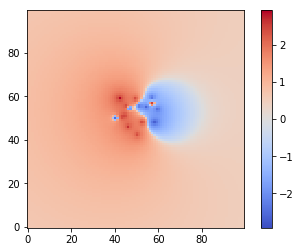

In [268]:
# Calculate the potential (v) using superposition. V = q/r
v = np.zeros_like(x + y)
for charge in charges:
    v += charge[0] / np.sqrt((charge[1] - x)**2 + (charge[2] - y)**2)

plot(v)

# Multipole Expansion

## Monopole

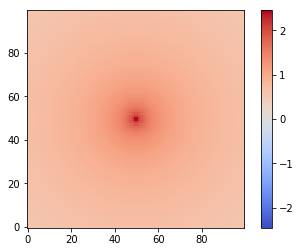

In [269]:
# Monopole at some distance r from (0, 0) is just 1/r sum of q
total_q = np.sum(charges[:,0])

mono_v = total_q / r
plot(mono_v)

## Dipole

[[ 9.34885318 -0.58393986]
 [-8.97204936  1.28886055]
 [ 7.43289342  7.37156612]
 [-7.38816172 -9.98048945]
 [ 0.65590087 -7.17274338]
 [-7.83383871  9.72823844]
 [-9.9765511  -4.47054574]
 [ 3.02913018 -4.95981433]
 [ 2.92947149 -1.53222934]
 [-4.596491    6.11580827]
 [-5.07741146  1.74107901]
 [-6.59245261  1.0468315 ]
 [-7.40092807  9.49034281]
 [-3.56176485 -3.30898215]
 [-4.81052394 -5.56124212]
 [-0.24316952  9.2966194 ]
 [-8.21396213  1.6511682 ]
 [-1.70871269 -6.05246086]] [-52.97976802   4.10806707]


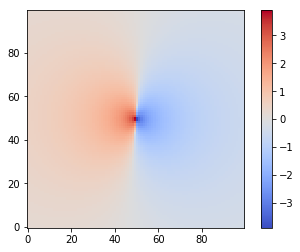

In [270]:
# Dipole at some distance r is 1/r^2 * dipole_moment dot vec(r)

dipole_moments = charges[:,0][:,np.newaxis] * (charges[:,1:] - r0)
dipole_moment = np.sum(dipole_moments, axis=0)
print(dipole_moments, dipole_moment)

di_v = np.dot(normed_grid, dipole_moment) / r**2
plot(di_v)

## Quadrupole

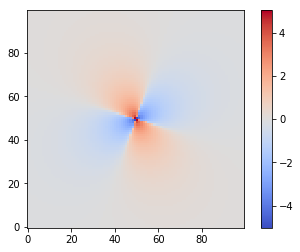

In [271]:
quad_v = np.zeros_like(x + y)
for charge in charges:
    quad_v += charge[0] * (3 *  np.dot(normed_grid, charge[1:])**2 - np.linalg.norm(charge[1:])**2)

quad_v /= (2 * r**3)
plot(quad_v)

# Comparison

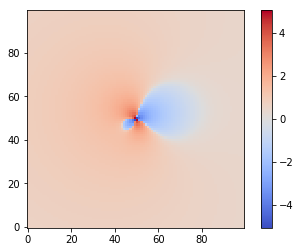

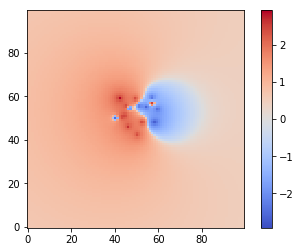

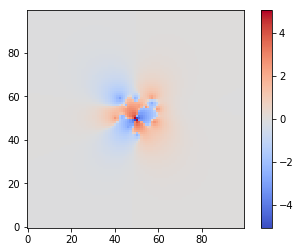

In [272]:
plot(mono_v + di_v + quad_v)
plot(v)
plot(-v + mono_v + di_v + quad_v) # Should go to 0 a reasonable distance from our charges